# Закономерности определяющие успешность компьютерной игры для Интернет-магазина

## Описание проекта

Интернет-магазин «Стримчик» продает компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить закономерности определяющие успешность компьютерной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Содержание
1. [Шаг 1. Файл с данными, изучение общей информации](#start)
2. [Шаг 2. Подготовка данных](#step2)
    * [2.1 Замена названий столбцов (приведем к нижнему регистру).](#step2.1)
    * [2.2 Преобразование данных в нужные типы с описанием.](#step2.2)
    * [2.3 Обработка пропусков](#step2.3)
    * [2.4 Подсчет суммарных продаж во всех регионах и создание отдельного столбца.](#step2.4)
3. [Шаг 3. Исследовательский анализ данных](#step3)
    * [3.1 Количество выпущенных игр в разные годы. Нужны ли данные за все периоды.](#step3.1)
    * [3.2 Динамика продаж по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. Характерный срок появления новых и исчезновения старых платформ.](#step3.2)
    * [3.3 Определение актуального периода и отбор данных для прогноза на 2017 год. ](#step3.3)
    * [3.4 Платформы лидеры по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.](#step3.4)
    * [3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.](#step3.5)
    * [3.6 Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Диаграмма рассеяния и корреляция между отзывами и продажами с выводами. Выводы с продажами игр на других платформах.](#step3.6)
    * [3.7 Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами.](#step3.7)
4. [Шаг 4. Портрет пользователя каждого региона.](#step4)
 [Определим для пользователя каждого региона (NA, EU, JP):](#step4)
    * [Самые популярные платформы (топ-5). Описать различия в долях продаж.](#step4)
    * [Самые популярные жанры (топ-5). Поясните разницу.](#step4)
    * [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#step4)
5. [Шаг 5. Проверка гипотез](#step5)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#step5)
    * [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#step5)
6. [Шаг 6. Общий вывод](#step6)

<a id="start"></a>
## Шаг 1. Файл с данными, изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# путь к файлу:

df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных

В данной таблице 16715 строк (список названий различных игр) и 11 столбцов. Названия столбцов следующие:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Нужно названия столбцов привести к нижнему регистру.

В столбце 'Year_of_Release' поменять тип данных на 'int'.

В столбце 'User_Score' поменять тип данных на 'float'.

In [5]:
# посмотрим кол-во пропусков:

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В таблице 16715 строк и в 6 столбцах из 11 имеются пропуски в следующем количестве:
    - Name                  2
    - Year_of_Release     269
    - Genre                 2
    - Critic_Score       8578
    - User_Score         6701
    - Rating             6766

In [6]:
df.duplicated().sum()

0

Строк дубликатов в таблице не имеется.

In [7]:
df['Year_of_Release'].min()

1980.0

In [8]:
df['Year_of_Release'].max()

2016.0

В таблице информация о продажах компьютерных игр с 1980г. по 2016 г.

<a id="step2"></a>
## Шаг 2. Подготовка данных
Замена названий столбцов (привести к нижнему регистру);

Преобразование данных в нужные типы с описанием.

Обработка пропусков и при необходимости:
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
* Описать причины, которые могли привести к пропускам;
* Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;

Подсчет суммарных продаж во всех регионах и создание отдельного столбца.

<a id="step2.1"></a>
#### 2.1 Замена названий столбцов (приведем к нижнему регистру).

In [9]:
# приведем к нижнему регситру названия столбцов

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов привели к нижнему регистру.

<a id="step2.2"></a>
#### 2.2 Преобразование данных в нужные типы с описанием.

Столбец "year_of_release" (год выпуска игры) имеет 269 строк пропусков из 16715 строк. В таблице данные за последние 36 лет с 1980 г., и возможно по каким то играм, особенно старым, не было точной информации по году выпуска игры. Средними/медианами эти пропуски не заполнить, и удалить их нельзя, так как потеряются важные данные для анализа по другим столбцам-параметрам этих строк. Поэтому заменим эти пропуски на "нереальные" данные на "-1", и также поменяем тип данных столбца "year_of_release" на целочисленный.

In [12]:
#  в столбце year_of_release заменим пропуски на -1 и поменяем тип данных на целочисленный

df['year_of_release'].fillna(-1, inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')

Теперь посмотрим столбец 'user_score' (рейтинг от игроков). Тип данных почему то формат 'object, что странно, ведь если бы там были только числа и NaN'ы, то формат был бы 'float'. Посмотрим уникальные значения этого столбца:

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков "nan", есть аббревиатура "tbd". Что значит это сокращение? Посмотрев в интернете выясняем, что эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. - Читайте подробнее на FB.ru: https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie

<a id="step2.3"></a>
#### 2.3 Обработка пропусков.

В таблице 16715 строк и в 6 столбцах из 11 имеются пропуски в следующем количестве:
    - Name                  2
    - Year_of_Release     269
    - Genre                 2
    - Critic_Score       8578
    - User_Score         6701
    - Rating             6766

Обычные пропуски NaN в столбце 'user_score' появились возможно из-за того что, не сразу появились сервисы, где организовано собираются рейтинги, отзывы от рядовых пользователей. Так как числовой тип столбца 'user_score' нам необходим. И 'tbd' фактически является NaN, поэтому заменим NaN и tbd на значение "-1" и приведем значение столбца к числовому:

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

По столбцу critic_score (рейтинг от специалистов-критиков) также очень много пропусков, имеется 8578 пропусков в 16715 строк. Так как массив данных очень большой за 36 лет с 1980 г., поэтому конечное не все игры имеют рейтинги от критиков. И также раньше отсутствовали организованные сервисы, где собирались рейтинги критиков.

Будет неправильно заполнить рейтинг игры от критиков и пользователей средним или медианой, даже если бы их посчитали внутри для каждого жанра отдельно. Тем не менее, чтобы иметь возможность быстрой фильтрации данных и возможность их беспрепятственно обрабатывать, поставим этим играм с пропусками рейтинг "-1" (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, не перемешаем игры с NaN и с реально нулевым рейтингом):

In [15]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [16]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

Итак пропуски остались только в трех столбцах.

В столбце rating (рейтинг от ESRB) имеется 6766 пропусков. Что это за рейтинг, посмотрим в Википедии. Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей. Рейтинги ESRB действительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии, а также в Австрали.
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Так как в нашей таблице данные общемировые и не все игры распространены именно в США и Канаде, поэтому эти игры не имеют рейтингов от ESRB. Ну и конечное нельзя заполнить эти пропуски усредненными данными. Поэтому заполним эти пропуски аббревиатурой "no_info".

Также имеются по 2 пропуска в столбцах name и genre. Также заполним эти пропуски аббревиатурой "no_info".

In [17]:
df['name'] = df['name'].fillna('no_info')
df['genre'] = df['genre'].fillna('no_info')
df['rating'] = df['rating'].fillna('no_info')

In [18]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Проверили таблицу, все пропуски в столбцах обработаны и отсутствуют.

<a id="step2.4"></a>
#### 2.4 Подсчет суммарных продаж во всех регионах и создание отдельного столбца.

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [20]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_info,31.38


Создали отдельный столбец "total_sales" с суммарными продажами по всему миру.

<a id="step3"></a>
## Шаг 3. Исследовательский анализ данных

* 1. Количество выпущенных игр в разные годы. Нужны ли данные за все периоды.
* 2. Динамика продаж по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. Характерный срок появления новых и исчезновения старых платформ.
* 3. Определение актуального периода и отбор данных для прогноза на 2017 год.
* 4. Платформы лидеры по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.
* 5. График «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.
* 6. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Диаграмма рассеяния и корреляция между отзывами и продажами с выводами. Выводы с продажами игр на других платформах.
* 7. Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами.

<a id="step3.1"></a>
### 3.1 Количество выпущенных игр в разные годы. Нужны ли данные за все периоды.

In [21]:
year_count = df.groupby('year_of_release')['name'].agg('count')

(1, 37.5)

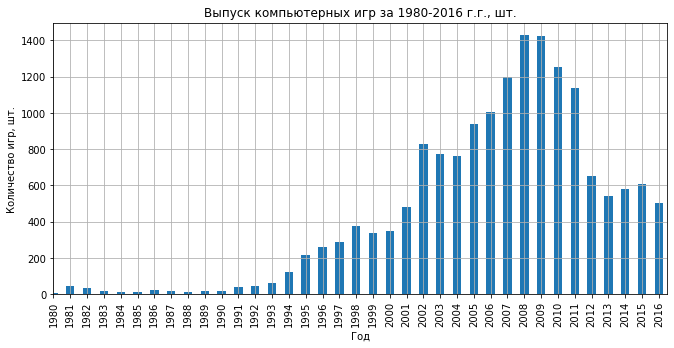

In [22]:
year_count_plot = year_count.plot(kind='bar', figsize=(11,5), grid=True, title = 'Выпуск компьютерных игр за 1980-2016 г.г., шт.')
year_count_plot.set_xlabel('Год')
year_count_plot.set_ylabel('Количество игр, шт.')
year_count_plot.set_xlim(1)

По графику видно, что основной рост производства игр начался с 1994 года. Резкий скачок по количеству игр выпущенных в год, произошел в 2002 году. Пик по выпуску игр приходится на 2008 и 2009 года, более 1400 игр в год. После этого начался спад, связанный с развитием мобильных устройств, смартфонов, интеграции интернета и соц.сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, снизилось их производство.

<a id="step3.2"></a>
### 3.2 Динамика продаж по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. Характерный срок появления новых и исчезновения старых платформ.

Составим таблицу десяти лидеров платформ по суммарным продажам во всем мире за все годы.

In [23]:
top10_sales = df.pivot_table(index='platform', values='total_sales', aggfunc=('count', 'sum'))
top10_sales.sort_values('sum', ascending=False).head(10)

,count,sum
platform,,
PS2,2161,1255.77
X360,1262,971.42
PS3,1331,939.65
Wii,1320,907.51
DS,2151,806.12
PS,1197,730.86
GBA,822,317.85
PS4,392,314.14
PSP,1209,294.05


Из таблицы видим, что безусловным лидером по количеству выпущенных игр и общим продажам миллион копий за все 36 лет является PS2. Затем идут платформы X360, PS3 и Wii. Платформа DS занимает 5 место по количеству проданных копий игр, хотя по количеству выпущенных 2151 игр платформа DS практически не отстает от лидера PS2, имеющая 2161 игр.

Построим распределение платформ по общим продажам по годам. Возьмем данные с 1994 г., когда начался существенный рост производства компьютерных игр.

In [24]:
platform_sales = (
            df
                .query('year_of_release >= 1994')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

In [25]:
pd.set_option('display.max_columns', None)
display(platform_sales)

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,0.80,12.87,NaN,6.03,NaN,NaN,NaN,NaN,NaN,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,0.33,4.22,NaN,35.96,NaN,NaN,NaN,NaN,NaN,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,0.10,10.58,0.03,94.70,NaN,NaN,NaN,NaN,NaN,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,NaN,11.27,NaN,136.17,NaN,NaN,NaN,NaN,NaN,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,NaN,3.26,NaN,169.49,NaN,NaN,NaN,NaN,NaN,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,NaN,4.74,NaN,144.53,NaN,NaN,NaN,NaN,NaN,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,NaN,4.66,NaN,96.37,39.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,NaN,5.47,NaN,35.59,166.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,NaN,NaN,8.57,NaN,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


Посмотрим описание полученной таблицы распределения платформ по продажам по годам среднее, медиану, стандартное отклонение, количество лет и разброс их значений:

In [26]:
ps = platform_sales.describe()

round(ps,2)

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
count,2.00,6.00,7.00,10.00,8.00,8.00,7.00,1.00,7.00,1.00,3.00,23.00,1.00,10.00,12.00,11.00,4.00,12.00,6.00,6.00,1.00,6.00,1.00,3.00,11.00,5.00,12.00,9.00,4.00
mean,0.05,42.97,2.28,80.28,19.01,39.11,28.10,8.13,31.14,0.11,0.41,10.99,0.03,72.76,102.80,84.67,78.54,24.13,8.97,5.60,0.36,14.11,0.16,0.47,81.02,16.44,80.10,27.95,39.83
std,0.04,18.28,2.54,59.80,13.38,32.77,18.85,NaN,21.88,NaN,0.36,7.78,NaN,63.35,79.41,54.64,40.57,20.19,4.73,3.97,NaN,16.29,NaN,0.20,79.14,7.07,57.48,26.43,20.31
min,0.02,15.14,0.02,1.54,3.60,0.07,0.27,8.13,0.08,0.11,0.10,2.85,0.03,2.07,0.45,3.60,25.99,0.12,4.25,0.09,0.36,0.22,0.16,0.28,0.18,4.60,1.52,0.18,18.96
25%,0.04,31.78,0.16,19.50,8.52,4.81,18.80,8.13,18.61,0.11,0.22,4.99,0.03,13.90,35.98,34.36,58.44,6.08,5.03,3.69,0.36,0.44,0.16,0.37,6.17,16.35,29.04,0.99,24.35
50%,0.05,47.56,1.07,102.28,15.97,45.26,27.62,8.13,34.10,0.11,0.33,9.28,0.03,65.33,89.70,107.36,84.62,26.19,8.42,5.30,0.36,8.45,0.16,0.46,59.65,17.56,92.00,22.26,40.11
75%,0.06,55.27,4.27,127.56,29.18,64.69,39.71,8.13,44.37,0.11,0.56,12.64,0.03,126.22,170.90,124.73,104.72,39.30,11.57,7.46,0.36,28.13,0.16,0.57,144.96,21.65,124.03,49.08,55.59
max,0.08,63.20,5.99,146.94,38.00,77.91,51.81,8.13,57.87,0.11,0.80,35.03,0.03,169.49,211.81,156.78,118.90,55.32,16.19,11.57,0.36,35.08,0.16,0.68,206.97,22.03,170.03,65.42,60.14


Получим медиану по количеству лет существования компьютерных игр.

In [27]:
ps.loc['count'].median()

6.0

По выборке с 1994г. по всем платформам характерный срок появления новых и исчезновения старых платформ за период с 1994г. по 2016г. по медиане составляет ровно 6 лет.

Теперь возьмем данные только по 10 самым крупным платформам с 1994г. и создадим таблицу.

In [28]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [29]:
big10_platforms = platform_sales[top_platforms]
big10_platforms

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
year_of_release,,,,,,,,,,
1994,NaN,NaN,NaN,NaN,NaN,6.03,NaN,NaN,NaN,12.87
1995,NaN,NaN,NaN,NaN,NaN,35.96,NaN,NaN,NaN,4.22
1996,NaN,NaN,NaN,NaN,NaN,94.70,NaN,NaN,NaN,10.58
1997,NaN,NaN,NaN,NaN,NaN,136.17,NaN,NaN,NaN,11.27
1998,NaN,NaN,NaN,NaN,NaN,169.49,NaN,NaN,NaN,3.26
1999,NaN,NaN,NaN,NaN,NaN,144.53,NaN,NaN,NaN,4.74
2000,39.17,NaN,NaN,NaN,NaN,96.37,0.07,NaN,NaN,4.66
2001,166.43,NaN,NaN,NaN,NaN,35.59,61.53,NaN,NaN,5.47
2002,205.38,NaN,NaN,NaN,NaN,6.67,74.16,NaN,NaN,8.57


Построим график "Суммарные продажи топ-10 платформ по годам, млн.копий".

Text(0, 0.5, 'Млн.копий')

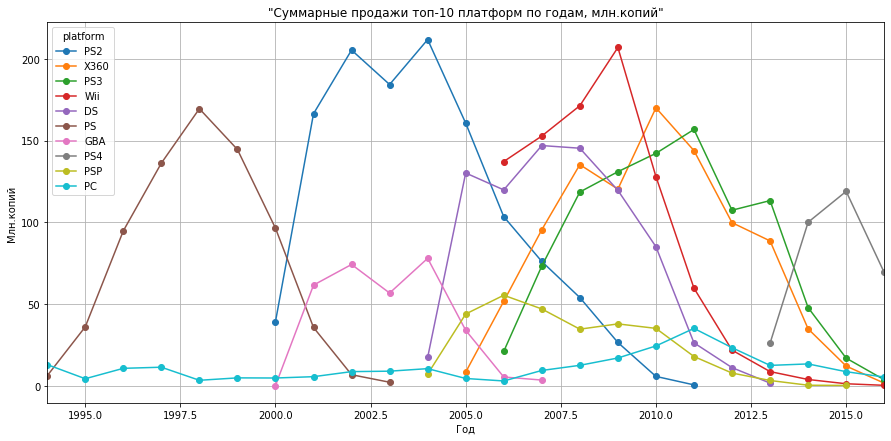

In [30]:
bp_plot = big10_platforms.plot(style='o-', grid=True, figsize=(15, 7), title = ('"Суммарные продажи топ-10 платформ по годам, млн.копий"'))
bp_plot.set_xlabel('Год')
bp_plot.set_ylabel('Млн.копий')

На данном графике видем жизненный цикл 10 платформ лидеров по продажам с 1994г. по 2016г. Например, платформа PS2 появилась в 2000г., пережила до 2004 г. огромный взлет по продажам, в 2004 г. продажи PS2 составили более 210 млн.копий за год. После 2004 г. начался резкий спад, и в 2011г. выпуск платформы PS2 полностью прекратилось.

Посмотрим также подробное описание таблицы распределения 10 платформ лидеров по продажам по годам среднее, медиану, стандартное отклонение, количество лет и разброс их значений:

In [31]:
median_years = big10_platforms[top_platforms].describe()
median_years

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
count,12.000000,12.000000,11.000000,11.000000,10.000000,10.000000,8.000000,4.000000,12.000000,23.000000
mean,102.796667,80.103333,84.667273,81.016364,80.276000,72.758000,39.110000,78.535000,24.127500,10.985217
std,79.405729,57.484408,54.637565,79.136330,59.796231,63.351713,32.768255,40.567917,20.190759,7.775982
min,0.450000,1.520000,3.600000,0.180000,1.540000,2.070000,0.070000,25.990000,0.120000,2.850000
25%,35.977500,29.045000,34.360000,6.170000,19.497500,13.900000,4.810000,58.435000,6.080000,4.995000
50%,89.705000,91.995000,107.360000,59.650000,102.280000,65.330000,45.265000,84.625000,26.185000,9.280000
75%,170.900000,124.032500,124.725000,144.960000,127.557500,126.220000,64.687500,104.725000,39.295000,12.645000
max,211.810000,170.030000,156.780000,206.970000,146.940000,169.490000,77.910000,118.900000,55.320000,35.030000


In [32]:
median_years.loc['count'].median()

11.0

По выборке из 10 самых крупных по продажам Платформ характерный срок появления новых и исчезновения старых платформ за период с 1994г. по 2016г. по медиане составляет ровно 11 лет.

<a id="step3.3"></a>
### 3.3 Определение актуального периода и отбор данных для прогноза на 2017 год.

Из предыдущего вопроса выяснили, что если брать по всем платформам, то средний срок жизненного цикла по медиане составляет 6 лет, если смотреть только по топ-10 платформам лидерам, то срок составит 11 лет.

Для прогноза продаж на 2017 г. актуальным периодом анализа самых популярных платформ возьмем последние три года с 2014г. по 2016 г. Это ровно половина от среднего срока 6 лет жизненного цикла по всем платформам. Для рассмотрения влияния рейтингов от критиков и игроков будем брать срок лидеров топ-10 за последние 11 лет с 2005 г.

<a id="step3.4"></a>
### 3.4 Платформы лидеры по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.

Составим таблицу лидеров по продажам начиная с 2014 г.

In [33]:
# за последние три года
platform_top10 = (
            df
            .query('year_of_release >= 2014')
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
)

In [34]:
platform_top10.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Из данной таблицы видим, что безусловным лидером, с большим отрывом от конкурентов, является платформа PS4, его общие продажи за последние три года составили 288,15 млн.копий. Затем идут следующие лидеры, также молодые платформы это XOne и 3DS.

Для более детально анализа возьмем первые 7 платформ лидеров

In [35]:
top7 = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC']

Составим таблицу и график продаж за последние 11 лет с 2005 г.

In [36]:
# возьмем динамику за последние 11 лет с 2005
big7_sales = platform_sales[top7]
big7_sales = big7_sales.query('year_of_release >= 2005')
big7_sales

platform,PS4,XOne,3DS,PS3,X360,WiiU,PC
year_of_release,,,,,,,
2005,NaN,NaN,NaN,NaN,8.25,NaN,4.37
2006,NaN,NaN,NaN,20.96,51.62,NaN,2.85
2007,NaN,NaN,NaN,73.19,95.41,NaN,9.28
2008,NaN,NaN,NaN,118.52,135.26,NaN,12.42
2009,NaN,NaN,NaN,130.93,120.29,NaN,16.91
2010,NaN,NaN,NaN,142.17,170.03,NaN,24.28
2011,NaN,NaN,63.20,156.78,143.84,NaN,35.03
2012,NaN,NaN,51.36,107.36,99.74,17.56,23.22
2013,25.99,18.96,56.57,113.25,88.58,21.65,12.38


Text(0, 0.5, 'Млн.копий')

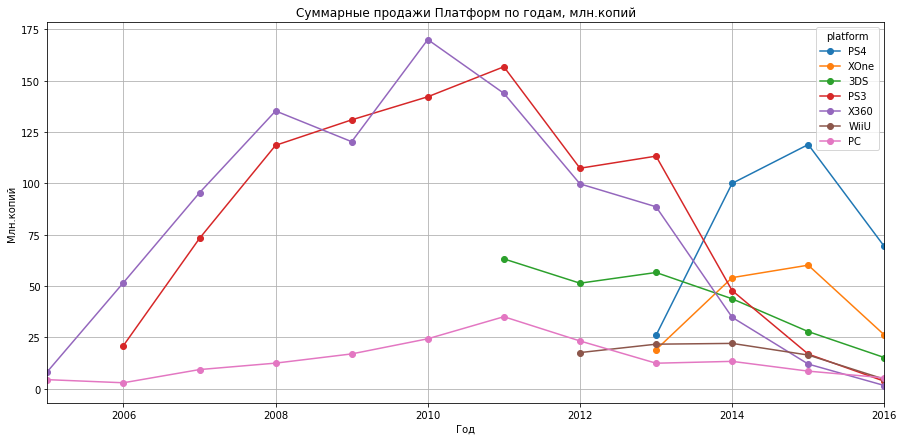

In [37]:
bp_plot_2005 = big7_sales.plot(style='o-', grid=True, figsize=(15, 7), title = ('Суммарные продажи Платформ по годам, млн.копий'))
bp_plot_2005.set_xlabel('Год')
bp_plot_2005.set_ylabel('Млн.копий')

Из таблицы и графика наглядно видно, что в последние годы лидерами по продажам являются платформы PS4, XOne и 3DS. Платформы PS4 и XOne появились в один год в 2013. Платформа 3DS выпускается с 2011 г. Остальные платформы PS3 и X360 завершают свой жизненный цикл, их продажи из года в год резко падают. Продажи по платформе PC за 2016г. заняли 4 место.

Создадим отдельную таблицу по 7 платформам лидеров начиная с 2005 г.:

In [38]:
df_7 = df.query('year_of_release >= 2005 & platform == @top7')
df_7.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_info,14.63


<a id="step3.5"></a>
### 3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.

Для создания Диаграммы размаха по 7 платформам лидерам создадим таблицу по продажам по играм по годам начиная с 2014 г.

In [39]:
df_7_2014 = df_7.query('year_of_release >= 2014')

In [40]:
sales_top7 = (
            df_7_2014
                .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
)
sales_top7

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne
name,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Honto no Kimochi,0.07,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Koisuru Diary,0.05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Yowamushi Pedal,0.04,NaN,NaN,NaN,NaN,NaN,NaN
Zero Escape: Zero Time Dilemma,0.08,NaN,NaN,NaN,NaN,NaN,NaN
ZombiU,NaN,NaN,NaN,0.06,NaN,NaN,0.01


Создадим таблицу описания полученной таблицы распределения 7 лидеров платформ по продажам по годам среднее, медиану, стандартное отклонение, количество лет и разброс их значений:

In [41]:
round(sales_top7.describe(), 2)

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne
count,212.00,151.00,219.00,376.00,73.00,111.00,228.00
mean,0.41,0.18,0.31,0.77,0.59,0.43,0.62
std,1.19,0.33,0.63,1.61,1.16,0.63,1.05
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01
25%,0.03,0.02,0.04,0.06,0.05,0.07,0.05
50%,0.09,0.06,0.11,0.18,0.19,0.18,0.20
75%,0.25,0.20,0.33,0.69,0.57,0.50,0.63
max,11.68,3.05,5.27,14.63,7.09,4.28,7.39


Из таблицы описания видим, что с 2014 г. самое большое количество игр продано по платформе PS4 и составило 376 игр. Максимальное число проданных копий по одной игре также по платформе PS4 14,63 млн.копий. По количеству проданных игр за последние три года на втором и третьем местах соответственно XOne и 3DS. Хотя по максимальному количеству проданных копий по одной игре на втором месте 3DS с показателем 11,68 млн.копий.

Теперь создадим уже сам график "ящик с усами" платформ лидеров за последние три года, начиная с 2014г.

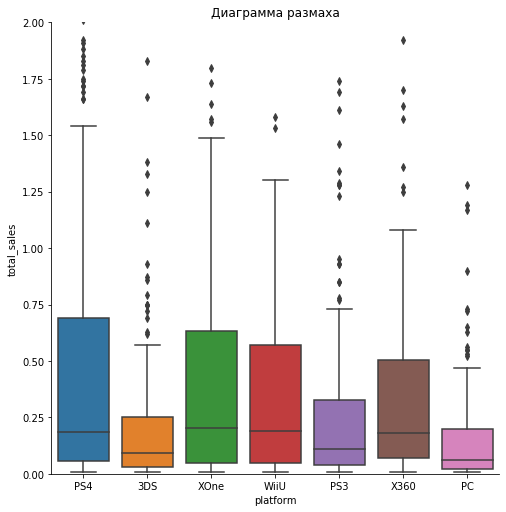

In [42]:
df_7_boxplot = sns.catplot(x='platform', y='total_sales', kind='box', data=df_7_2014, orient='v',height=7)
df_7_boxplot.set(ylim=(0, 2))
df_7_boxplot.set(title=('Диаграмма размаха'))

Из таблицы описания и диаграммы размаха по 7 лидерам платформам видно, что медиана продаж в среднем по одной компьютерной игре больше у платформы XOne и составляет 0,2 млн.копий. На втором месте платформа PS4 с показателем 0,18 млн.копий, но у нее больше всех скошена диаграмма вправо в большую сторону, третий квартиль составляет 0,69 млн.копий, и платформа PS4 имеет самый больший максимальный размах, за которым уже находятся выбросы, это более 1,5 млн.копий продаж игры. Самая маленькая медиана по продажам у платформы PC составляет 0,06 млн.копий, затем идет платформа 3DC с медианой 0,09 млн.копий. Самое большое стандартное отклонение у платформы PS4, которое составляет 1,61. Это значит что у платформы PS4 очень большое разнообразие компьютерных игр. Самое маленькое стандартное отклонение у платформы PC, и составляет 0,33.

<a id="step3.6"></a>
### 3.6 Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Диаграмма рассеяния и корреляция между отзывами и продажами с выводами. Выводы с продажами игр на других платформах.

Чтобы выяснить влияние рейтингов и отзывов от критиков и пользователей на продажи игр сперва создадим таблицу матрицу корреляций по одной из самой популярной платформе PS3. Данные возьмем за период с 2005 г. по 2016 г.

In [43]:
corr_ps3 = (
    df_7
    .query('platform == "PS3" & critic_score > 0 & user_score > 0')
    .pivot_table(index='name', values=['critic_score','user_score','total_sales'])
)

round(corr_ps3.corr(),2)

,critic_score,total_sales,user_score
critic_score,1.00,0.43,0.63
total_sales,0.43,1.00,0.14
user_score,0.63,0.14,1.00


Из таблицы матрицы корреляции видно, что больше всего на продажи имеет влияние рейтинг от специалистов-критиков, прямая положительная зависимость по коэффициенту корреляции Пирсона составила 0,43. Корреляция между продажами и рейтингом от пользователей составила 0,14.

Для наглядности также создадим матрицу диаграмм рассеяния по платформе PS3:

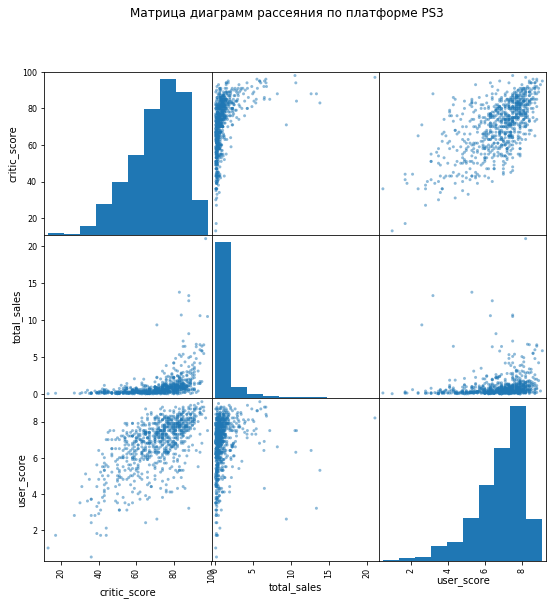

In [44]:
pd.plotting.scatter_matrix(corr_ps3, figsize=(9, 9))
plt.suptitle('Матрица диаграмм рассеяния по платформе PS3')
plt.show()

Из матрицы диаграмм рассеяния видим также, что чем выше рейтинг и отзыв от критиков и пользователей, тем выше продажи игр по платформе PS3. На диаграмме рассеяния рейтинга от критиков более отчетливо видно влияние на продажи.

Теперь расчитаем коэффициенты корреляции Пирсона по остальным 7 лидерам платформам, создадим для этого цикл:

In [45]:
for platform in top7:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = df_7.query('platform == @platform and (user_score > 0) and (critic_score > 0)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 2)))
        


PS4:
Коэффициент корреляции user_score и total_sales: -0.03
Коэффициент корреляции critic_score и total_sales: 0.41

XOne:
Коэффициент корреляции user_score и total_sales: -0.09
Коэффициент корреляции critic_score и total_sales: 0.41

3DS:
Коэффициент корреляции user_score и total_sales: 0.23
Коэффициент корреляции critic_score и total_sales: 0.34

PS3:
Коэффициент корреляции user_score и total_sales: 0.14
Коэффициент корреляции critic_score и total_sales: 0.43

X360:
Коэффициент корреляции user_score и total_sales: 0.11
Коэффициент корреляции critic_score и total_sales: 0.39

WiiU:
Коэффициент корреляции user_score и total_sales: 0.39
Коэффициент корреляции critic_score и total_sales: 0.35

PC:
Коэффициент корреляции user_score и total_sales: -0.03
Коэффициент корреляции critic_score и total_sales: 0.28


Из полученных данных видно, что в целом коэффициент влияния рейтинга от критиков больше, чем коэффициент влияния рейтинга от пользователей. Только по одной платформе WiiU, влияние рейтинга от пользователей больше чем влияние рейтинга от критиков. На продажи игр по платформам больше всего влияет рейтинг от специалистов-критиков, корреляция положительная, т.е. чем больше рейтинг от критиков тем больше продажи.

Для наглядности также построим графики диаграммы рассеяния влияние рейтингов на продажи по 7 лидерам платформам:

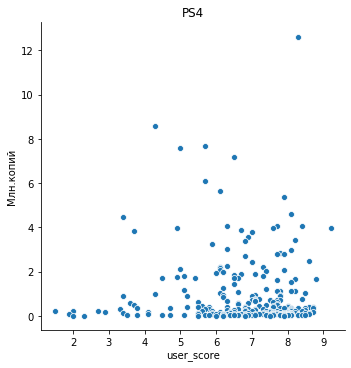

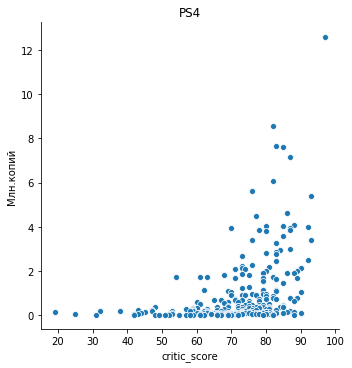

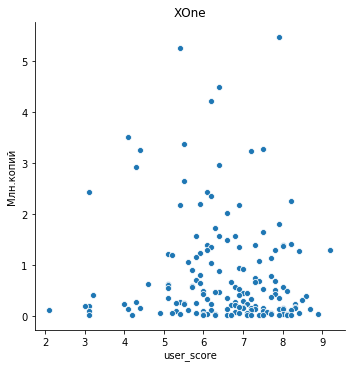

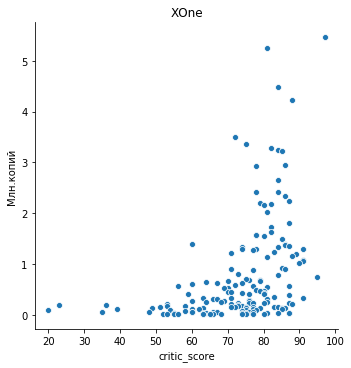

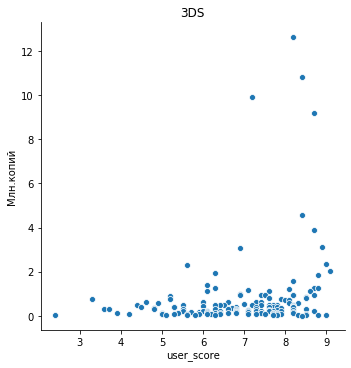

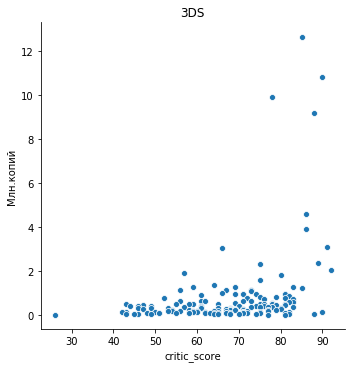

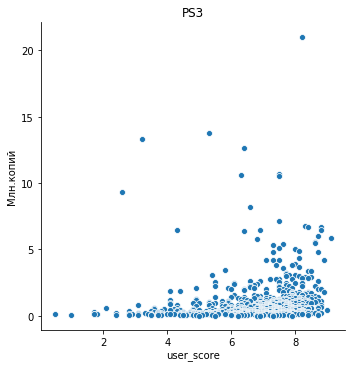

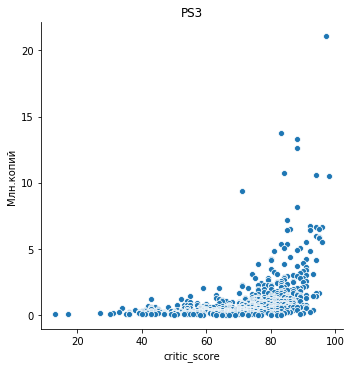

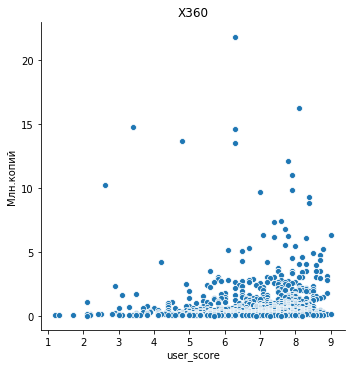

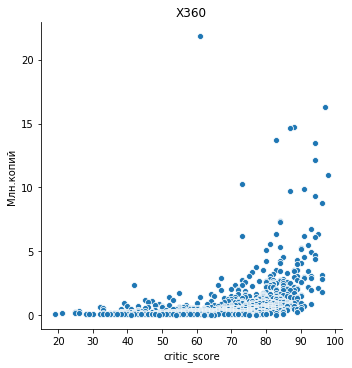

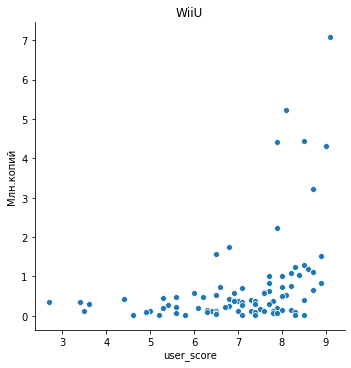

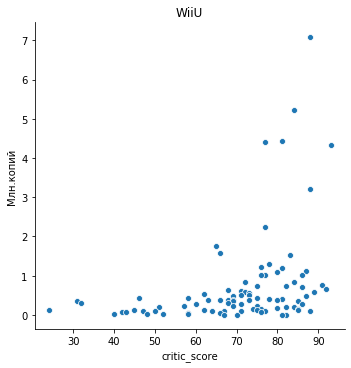

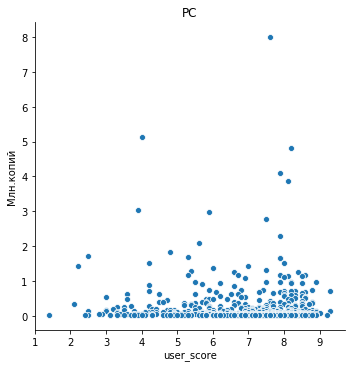

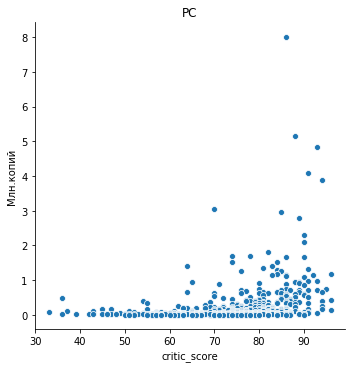

In [46]:
for platform in top7:
    for column in ['user_score', 'critic_score']:
        temp = df_7.query('platform == @platform and (user_score > 0) and (critic_score > 0)')
        sns.relplot(x=column, y="total_sales", data=temp)
        plt.ylabel('Млн.копий')
        plt.title(platform)

На графиках диаграмм рассеяния наблюдаем, что чем выше рейтинг и отзыв от критиков и пользователей, тем выше продажи игр по платформам. На диаграммах рассеяния рейтинга от критиков более отчетливо видны влияния на продажи.

<a id="step3.7"></a>
### 3.7 Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами.

Создадим таблицу и график по продажам в зависимости от жанра компьютерной игры за последние три года начиная с 2014г.

In [47]:
genre_sales = df_7.query('year_of_release >= 2014').pivot_table(index='genre', values='total_sales', aggfunc=('count','sum')).sort_values('sum', ascending=False)
genre_sales

,count,sum
genre,,
Action,496,190.50
Shooter,127,170.30
Sports,149,107.63
Role-Playing,162,95.34
Misc,91,30.96
Fighting,53,27.53
Racing,66,27.42
Platform,34,17.90
Adventure,106,15.03


Text(0, 0.5, 'Жанр')

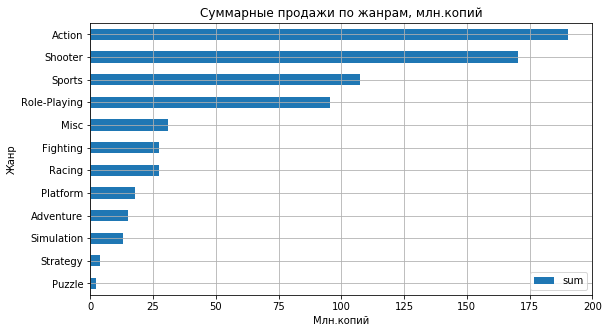

In [48]:
genre_pl = (
    genre_sales
    .sort_values('sum', ascending=True)
    .plot(y = 'sum', kind = 'barh', figsize=(9,5), grid=True, title='Суммарные продажи по жанрам, млн.копий')
)

genre_pl.set_xlabel('Млн.копий')
genre_pl.set_ylabel('Жанр')

Из таблицы и графика продажи по жанрам видим, что самыми крупными по продажам является большая четверка жанров. Это Action, Shooter, Sports и Role-Playing. У них значительный отрыв от остальных жанров. Лидером по жанрам является Action, за три года показатель 190,5 проданных млн.копий, и также лидер по количеству игр 496 штук. Самые низкие продажи у игр жанра Strategy и Puzzle, показатели 3,78 и 2,15 млн.копий за период с 2014г. Также стоит отметить, что производство и цены на игры лидеров жанра Action, Shooter, Sports значительно дороже, чем производство и цены на игры жанров находящихся в самом низу рейтинга по жанрам.

Для интереса составим и посмотрим таблицу лидеров топ 15 компьютерных игр по продажам за период с 2014 г. по 2016 г.

In [49]:
df_7.query('year_of_release >= 2014').pivot_table(index=['name', 'genre'], values='total_sales', aggfunc='sum').nlargest(15, 'total_sales')

,,total_sales
name,genre,
Call of Duty: Black Ops 3,Shooter,25.67
Call of Duty: Advanced Warfare,Shooter,21.97
Grand Theft Auto V,Action,19.26
FIFA 16,Sports,16.30
FIFA 15,Sports,16.21
Minecraft,Misc,13.02
Fallout 4,Role-Playing,12.67
Destiny,Shooter,12.54
Super Smash Bros. for Wii U and 3DS,Fighting,12.42


Из данной таблицы видно, что первые два места по продажам занимают игры жанра Shooter, и на третьем игра жанра Action. Игра жанра Misc опередила по продажам игру жанра Role-Playing.

<a id="step4"></a>
## Шаг 4. Портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Описать различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Создадим функцию для составления наглядных графиков по регионам мира топ-5 по платформам, жанрам и рейтингу от ESRB за актуальный период начиная с 2014 г.:

In [50]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = df_7.query('year_of_release >= 2014').groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка продажи, млн.копий', 'eu_sales': 'Европа продажи, млн.копий', 'jp_sales': 'Япония продажи, млн.копий'}
    color_dict = {'na_sales': None, 'eu_sales': 'green', 'jp_sales': 'gold'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], grid=True,
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel(groupby)
    plot.set_ylim(0, 140)
    plot.title.set_size(20)

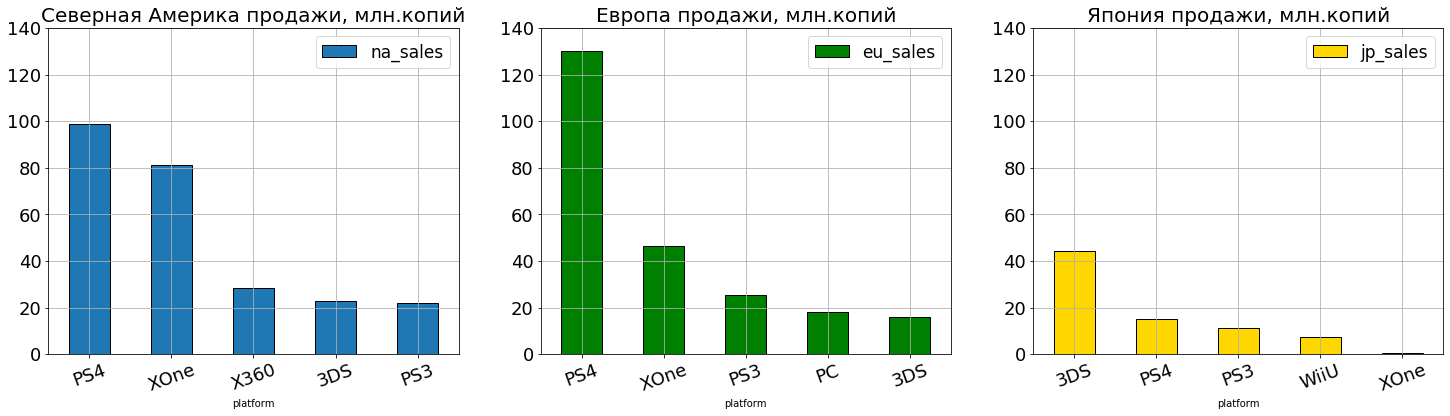

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

По графикам продаж топ-5 лидеров игровых платформ по регионам видим, что в Северной Америке и в Европе на первом и втором месте платформы PS4 и XOne соответственно. В Японии на первом месте по продажам платформа 3DS, на втором месте платформа PS4. В Европе самые большие продажи платформы PS4 свыше 120 млн.копий., на втором месте значительно отстает платформа XOne с продажами около 43 млн.копий.

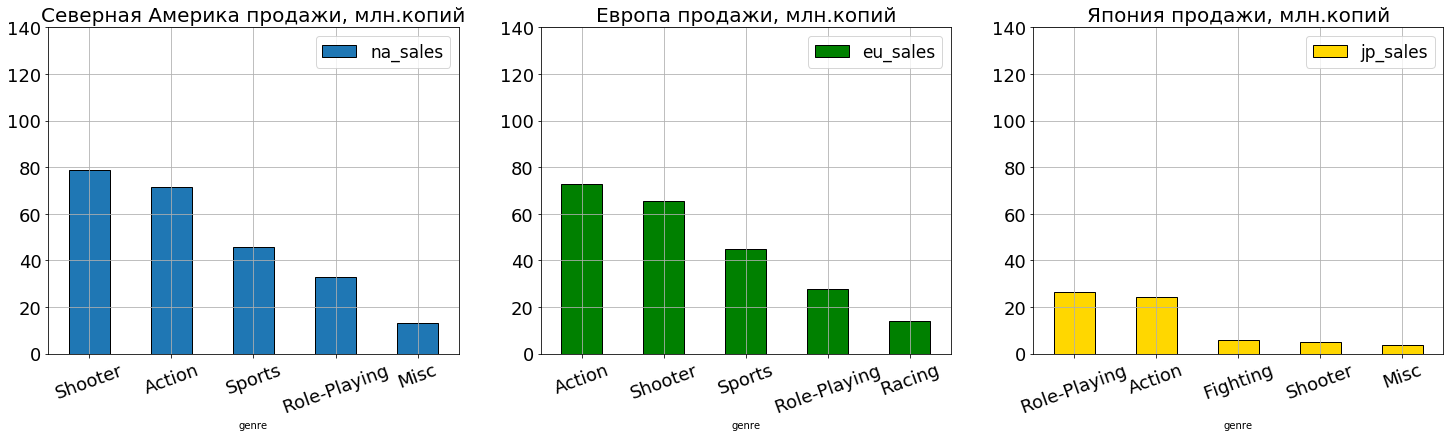

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

По графикам продаж топ-5 по жанрам за последние три года видим, что в Северной Америке лидером по жанру является Shooter продажи около 79 млн.копий, в Европе лидер Action продажи 76 млн.копий. В Японии лидером по продажам является жанр Role-Playing продажи в районе 22 млн.копий.

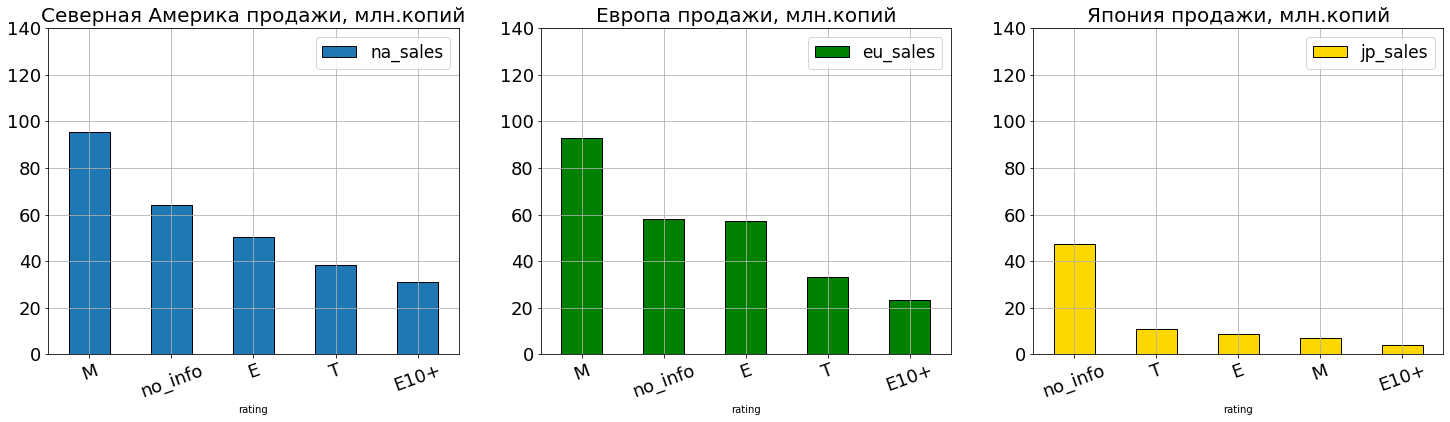

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

Рейтинги ESRB (https://www.esrb.org/ratings-guide/):

* E - для всех, от 6 лет
* E10+ - от 10 лет
* T - от 13 лет
* M - от 17 лет

Графики продаж топ-5 по рейтингу ESRB показывают, что в Северной Америке и Европе лидерами являются игры с рейтингом маркировкой М - от 17 лет. На втором месте в этих регионах игры без рейтинга от ESRB. На третьем месте игры с маркировкой Е - от 6 лет для всех. В Японии рейтинги ESRB не требуются, у них имеется своя система рейтингов, поэтому на первом месте по продажам игры без маркировки ESRB.

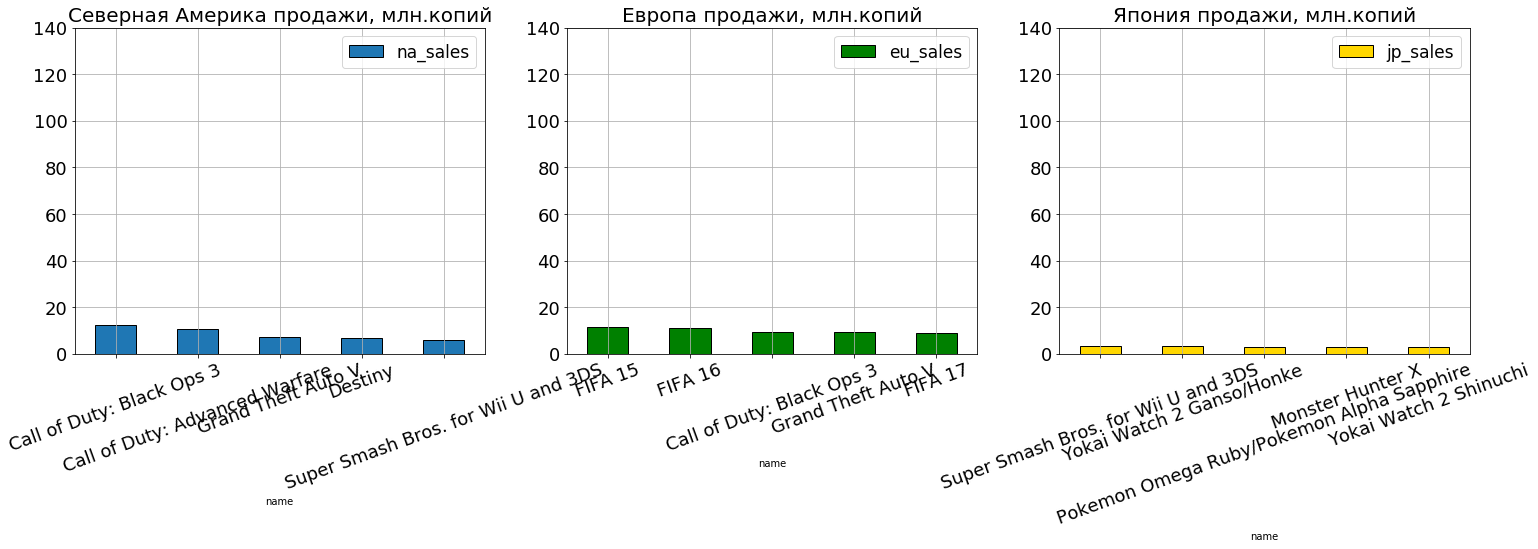

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('name', 'na_sales', 0)
top_in_regions_plot('name', 'eu_sales', 1)
top_in_regions_plot('name', 'jp_sales', 2)

По графикам продаж топ-5 по играм видно, что лидер в Европе и в Японии совпал, на первом месте в этих регионах игра Super Smash Bros. В Северной Америке лидер игра жанра Shooter. 

<a id="step5"></a>
## Шаг 5. Проверка гипотез
* 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

H0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Уровень критической значимости возьмем общепринятую α = 5%

Возьмем данные пользовательских рейтингов по платформам XOne и PC. Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод st.ttest_ind:

In [55]:
xbox_score = df_7.query('platform == "XOne" and user_score > 0')['user_score']
xbox_score.unique()

array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 4.3, 3.1, 6.1, 8.2,
       7.4, 5.9, 6.9, 6.6, 6.3, 6.8, 5.8, 7.3, 8. , 9.2, 7.8, 8.4, 5.1,
       5.2, 7.7, 5.6, 5.7, 7. , 6.7, 4.6, 8.1, 6. , 7.1, 3.2, 8.6, 8.5,
       5.3, 4. , 8.3, 3. , 8.7, 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8])

In [56]:
pc_score = df_7.query('platform == "PC" and user_score > 0')['user_score']
pc_score.unique()

array([7.6, 4. , 8.2, 7.9, 8.1, 3.9, 5.9, 7.5, 5.6, 4.8, 2.5, 5.3, 4.2,
       8. , 7. , 2.2, 6. , 5.4, 6.6, 8.4, 8.6, 6.7, 8.5, 6.9, 8.9, 5.5,
       6.2, 5.7, 8.8, 7.4, 6.8, 9.3, 8.3, 6.1, 7.3, 6.5, 7.7, 4.5, 3.6,
       3. , 6.4, 5.8, 4.7, 4.6, 5.2, 2.1, 6.3, 8.7, 3.7, 3.5, 3.3, 7.1,
       4.4, 3.2, 4.3, 7.2, 7.8, 4.9, 3.8, 4.1, 5. , 9. , 2.9, 5.1, 3.4,
       2.8, 3.1, 9.2, 1.4, 2.4])

Сравним теперь дисперсии выборок. Перед проведением проверки гипотез через T-критерий Стьюдента нужно сравнивать дисперсии двух выборок отдельно, и если они различаются более чем на 5%, то считаем отличие значимым и выбираем equal_var = False. Если выборки взяты из схожих по параметрам совокупностей, то тогда надо указывать этот параметр как True, и дисперсия каждой выборки будет оценена по объединённому датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой.

In [57]:
variance_xbox = np.var(xbox_score)
variance_xbox.round(2)

1.9

In [58]:
variance_pc = np.var(pc_score)
variance_pc.round(2)

2.29

In [59]:
(variance_pc / variance_xbox).round(2)

1.21

Дисперсии выборок различаются более чем на 5%, значит считаем отличие значимым и выбираем equal_var = False.

In [60]:
from scipy import stats as st

alpha = .05

# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам, применим метод st.ttest_ind:

results = st.ttest_ind(xbox_score, pc_score, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.002348015535956376
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Потому что средние рейтинги пользователей по платформам XOne и PC оличаются. Для наглядности создадим таблицу по среднему рейтингу платформ от пользователей за период начиная с 2005 г. по 2016 г.:

In [61]:
xone_pc = df_7.query('platform == "XOne" or platform == "PC" and user_score > 0')
                     
xone_pc_score = xone_pc.pivot_table(index = 'platform', values='user_score', aggfunc='mean')

In [62]:
round(xone_pc_score, 1)

,user_score
platform,
PC,6.9
XOne,4.5


По таблице видно, что средний рейтинг от пользователей платформы PC составляет 6.9, что гораздо выше, чем у XOne - 4.5.

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

H0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

Уровень критической значимости возьмем общепринятую α = 5%

In [63]:
action = df_7.query('genre == "Action" and user_score > 0')['user_score']

In [64]:
sports = df_7.query('genre == "Sports" and user_score > 0')['user_score']

Сравним теперь дисперсии выборок. Перед проведением проверки гипотез через T-критерий Стьюдента нужно сравнивать дисперсии двух выборок отдельно, и если они различаются более чем на 5%, то считаем отличие значимым и выбираем equal_var = False. Если выборки взяты из схожих по параметрам совокупностей, то тогда надо указывать этот параметр как True, и дисперсия каждой выборки будет оценена по объединённому датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой.

In [65]:
np.var(action).round(2)

1.69

In [66]:
np.var(sports).round(2)

2.66

In [67]:
(np.var(sports) / np.var(action)).round(2)

1.58

Дисперсии выборок различаются более чем на 5%, значит считаем отличие значимым и выбираем equal_var = False.

In [68]:
alpha = .05

# Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам, применим метод st.ttest_ind:

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4010511416426406e-16
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Потому что средние пользовательские рейтинги жанров Action и Sports отличаются между собой. Посмотрим следующую таблицу среднего рейтинга от пользователей по жанрам за период с 2005 г.:

In [69]:
action_sports = df_7.query('genre == "Action" or genre == "Sports" and user_score > 0')
                     
action_sports_score = action_sports.pivot_table(index = 'genre', values='user_score', aggfunc='mean')

In [70]:
round(action_sports_score, 1)

,user_score
genre,
Action,4.4
Sports,6.1


Из таблицы наглядно видно, что рейтинг по жанру Sports от пользователей выше и составляет 6.1 баллов. У игр жанра Action рейтинг от пользователей 4.4 баллов.

<a id="step6"></a>
## Шаг 6. Общий вывод

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников получили исторические данные Таблицу о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности. Для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные в таблице за 36 лет с 1980 года до 2016 года. Сейчас декабрь 2016 г., и планируется кампания на 2017-й. 

Сперва открыли файл с данными и изучили общую информацию. В таблице список из 16715 различных игр выпущенных с 1980 г. Таблица имеет 11 столбцов.

Затем перешли на этап подготовки данных. Заменили названия столбцов (привели к нижнему регистру). Преобразовали данные в нужные типы. Обработали пропуски. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

Провели исследовательский анализ данных. Посмотрели, сколько игр выпускалось в разные годы, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. Выяснили за какой характерный срок появляются новые и исчезают старые платформы. Определили что актуальный период это последние три года начиная с 2014г., чтобы построить прогноз на 2017 год. Платформы лидеры по продажам. Выбрали несколько потенциально прибыльных платформ. Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Посмотрели, как влияют на продажи внутри одной популярной платформы PS3, отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами, также и на других платформах лидерах. Посмотрели на общее распределение игр по жанрам.

Составили портрет пользователя каждого региона. Определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), самые популярные жанры (топ-5), влияет ли рейтинг ESRB на продажи в отдельном регионе.

Проверили две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Главные выводы - закономерности определяющие успешность игры, определение потенциально популярного продукта:

* Игра должна быть на платформе PS4, безусловного лидера по продажам, за последние три года продажи составили 288,15 млн.копий различных игр. Затем уже идут платформы лидеры XOne и 3DS. Платформы PS4 и XOne появились в один год в 2013. Платформа 3DS выпускается с 2011 г.
* Игра должна иметь высокие рейтинги и большое количество отзывов на игру от критиков-профессионалов. Чем выше рейтинги от критиков, тем больше продажи. Рейтинги от пользователей влияют на продажи незначительно.
* Относиться по жанру к лидеру по продажам жанру Action. Затем уже идут по убыванию жанры Shooter, Sports и Role-playing.
* Если планировать продажи для конкретного региона мира, то для Северной Америки и Европы лидеры продаж за последние три года платформы PS4 и XOne. Для Японии лидер платформа 3DS.
* По жанру в регионах Северной Америки лидер продаж Shooter, в Европе - Action, а в Японии - Role-Playing.
* По рейтингу ESRB в регионах Северной Америки и Европы лидеры продаж игры категории "М" (от 17 лет). В Японии по другому на первом месте игры с внутренней национальной системой оценки возрастного рейтинга CERO.

Дополнительно выяснили:
* Средний срок жизненного цикла игровой платформы входящий в топ по медиане составляет 11 лет.
* В целом из года в год общие продажи игровых платформ значительно снижаются из-за развития мобильных устройств, смартфонов, соц.сетей.
* Средние рейтинги пользователей по платформам XOne и PC оличаются. Так как средний рейтинг от пользователей платформы PC составляет 6.9 баллов, что гораздо выше, чем у XOne 4.5 баллов.
* Средние пользовательские рейтинги жанров Action и Sports также отличаются между собой. Рейтинг по жанру Sports от пользователей выше и составляет 6.1 баллов. У игр жанра Action рейтинг от пользователей 4.4 баллов.